In [ ]:
pip install geneticalgorithm2


 Average time of function evaluating (secs): 0.00012048589000038134

                                                                                                                                                                                                        
 The best found solution:
 [1.0002189]

 Objective function:
 4.7916497506867315e-08

 Used generations: 201
 Used time: 1 seconds


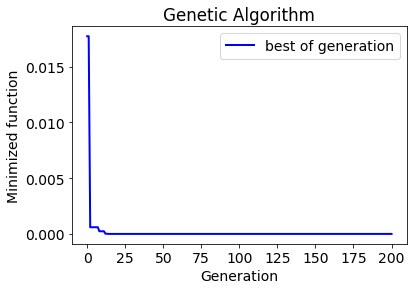

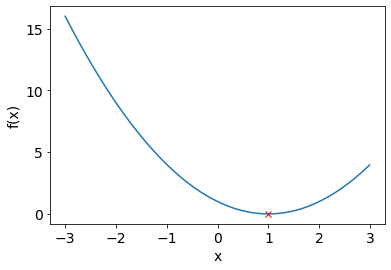

In [30]:
#https://pypi.org/project/geneticalgorithm2/

# EXEMPLO 1: Uma dimensão e parabola

import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm2 import geneticalgorithm2 as ga

def fobj(X):
    OF = (X[0]-1)**2
    return OF

varbound = np.array([[-4,4]])
model = ga(function=fobj, dimension = 1, 
                variable_type='real', 
                 variable_boundaries = varbound,
                 algorithm_parameters={'max_num_iteration': 200,
                                       'population_size':100}
            )

model.run();

xmin=model.output_dict['variable']

x = np.arange(-3, 3, 0.01)
y=fobj([x])
plt.rcParams.update({'font.size': 14})
plt.figure()
plt.plot(x,y)
plt.xlabel('x');plt.ylabel('f(x)');
plt.plot(xmin,fobj(xmin),'rx')


 Average time of function evaluating (secs): 0.00012691390999982843

                                                                                                                                                                                                        
 The best found solution:
 [ 0.00022009 -0.00133042]

 Objective function:
 0.00036076684043173657

 Used generations: 201
 Used time: 1 seconds


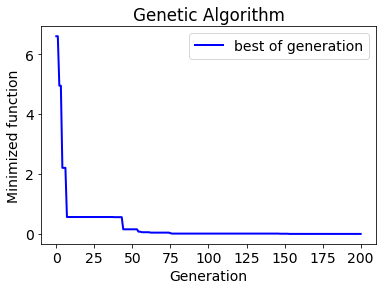

Text(0, 0.5, 'x2')

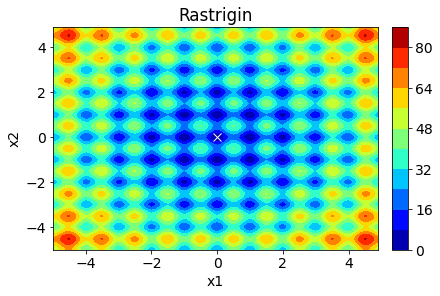

In [9]:
#https://pypi.org/project/geneticalgorithm2/

# EXEMPLO 2: DUAS DIMENSÕES E FUNÇÃO COMPLEXA - RASTRIGIN
import matplotlib.pyplot as plt
import numpy as np
from geneticalgorithm2 import geneticalgorithm2 as ga

#dimensão do problema
prob_dim=2;
#função Rastrigin
def f(X):
    dim=len(X)         
    OF=0
    for i in range (0,dim):
        OF+=(X[i]**2)-10*np.cos(2*np.pi*X[i])+10
    return OF

varbound=np.array([[-10,10]]*prob_dim)
model = ga(function=f, dimension = prob_dim, 
                variable_type='real', 
                 variable_boundaries = varbound,
                 variable_type_mixed = None, 
                 function_timeout = 10,
                 algorithm_parameters={'max_num_iteration': 200,
                                       'population_size':100,
                                       'mutation_probability':0.1,
                                       'elit_ratio': 0.01,
                                       'crossover_probability': 0.5,
                                       'parents_portion': 0.3,
                                       'crossover_type':'uniform',
                                       'mutation_type': 'uniform_by_center',
                                       'selection_type': 'roulette',
                                       'max_iteration_without_improv':None}
            )
model.run(no_plot=False,disable_printing=False,disable_progress_bar=False)
xmin=model.output_dict['variable']

#faz a figuras da função objetivo em mapa de cores
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-5, 5, 0.1)
X1, X2 = np.meshgrid(x1, x2)
Z=f([X1,X2])
plt.rcParams.update({'font.size': 14})
fig1, ax1 = plt.subplots(constrained_layout=True)
CS = ax1.contourf(X1, X2, Z, 10, cmap=plt.cm.jet, origin='lower')
fig1.colorbar(CS)
plt.plot(xmin[0],xmin[1],'wx',markersize=8)
plt.title('Rastrigin');
plt.xlabel('x1');plt.ylabel('x2')